# Retrieve SDSS Cutouts for a Bunch of RA,DEC pairs #

The goal is to retrieve the SDSS color image for a particular pointing, given a collection of RA and Dec values.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#from astropy.cosmology.funcs import distmod
from astropy.cosmology import WMAP9 as cosmo
from astropy.constants import c
from astropy import units as u
import warnings 
warnings.filterwarnings('ignore')
from pydl.pydlutils.spheregroup import spheregroup

In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [41]:
try:
    # Python 3.x
    from urllib.parse import urlencode
    from urllib.request import urlretrieve
except ImportError:
    # Python 2.x
    from urllib import urlencode
    from urllib import urlretrieve

In [42]:
import IPython.display

In [2]:
table_path = '/Users/rfinn/Dropbox/Research/APPSS/SDSSphot/run_sep14/'
latest_run = 'a100.code12.SDSSvalues170914.csv'
agc_cross = 'a100.sdsscross.code12.170914.csv'
HI = 'a100.code12.tab1.170914.csv'

In [7]:
infile = table_path+latest_run
sdss = np.recfromcsv(infile)

In [10]:
keepflag = (sdss['ra']> 150.) & (sdss['ra'] < 225.) & (sdss['objid'] > 12)
ra = sdss['ra'][keepflag]
dec = sdss['dec'][keepflag]

In [28]:
linking_length = 10. # arcmin

**Some Info on what spheregroup returns**

* grp = group number
* mult = number of galaxies in each group

In [29]:
%time grp, mult, frst, nxt = spheregroup(ra, dec, linking_length/60.)

CPU times: user 4.44 s, sys: 6.94 ms, total: 4.45 s
Wall time: 4.45 s


In [30]:
print grp[0:20]
print mult[0:20]
print frst[0:20]
print nxt[0:20]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  8 15 16 17 18]
[1 1 1 1 1 1 1 1 2 2 3 1 1 3 2 1 1 2 1 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20]
[-1 -1 -1 -1 -1 -1 -1 -1 15 38 43 -1 -1 55 44 -1 -1 -1 22 -1]


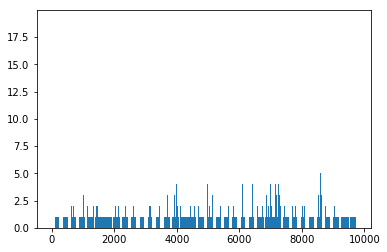

In [32]:
plt.figure()
t = plt.hist(grp,bins=len(grp))

In [36]:
npergrp, _ = np.histogram(grp, bins=len(grp), range=(0, len(grp)))
nbiggrp = np.sum(npergrp > 1).astype('int')
nsmallgrp = np.sum(npergrp == 1).astype('int')
ngrp = nbiggrp + nsmallgrp

In [37]:
print('Found {} total groups, including:'.format(ngrp))
print('  {} groups with 1 member'.format(nsmallgrp))
print('  {} groups with 2-5 members'.format(np.sum( (npergrp > 1)*(npergrp <= 5) ).astype('int')))
print('  {} groups with 5-10 members'.format(np.sum( (npergrp > 5)*(npergrp <= 10) ).astype('int')))
print('  {} groups with >10 members'.format(np.sum( (npergrp > 10) ).astype('int')))

Found 9737 total groups, including:
  7188 groups with 1 member
  2453 groups with 2-5 members
  88 groups with 5-10 members
  8 groups with >10 members


## Now dowload an image for each group ##

In [38]:
# try getting picture for first group with more than 10 members

ragroup = ra[npergrp > 10]
decgroup = dec[npergrp > 10]

print ragroup


[ 162.02654776  162.18084527  168.01632596  169.66514853  170.13251223
  172.25965199  188.61576262  190.08628275]


In [45]:
testcoord = SkyCoord(ragroup[0]*u.deg, decgroup[0]*u.deg, frame='icrs')

impix = 1024
imsize = 20*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=testcoord.ra.deg, 
                                     dec=testcoord.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'group0_SDSS_cutout.jpg')

('group0_SDSS_cutout.jpg', <httplib.HTTPMessage instance at 0x11f036560>)

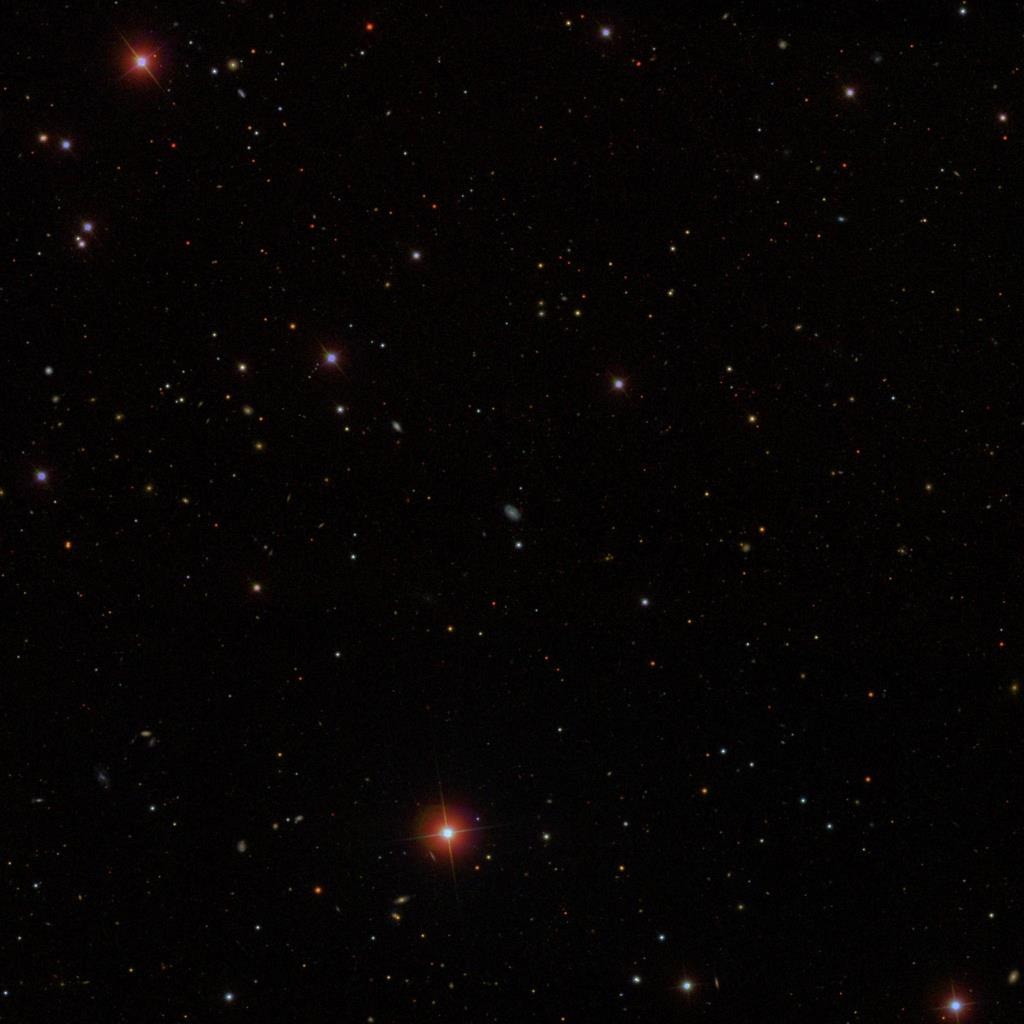

In [46]:
IPython.display.Image('group0_SDSS_cutout.jpg')
